In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

In [92]:
# 데이터 로드
df = pd.read_csv("data/막곡농장 1주령.csv")
df.shape

(3589, 12)

In [93]:
df = df[~(df['WEIGHT_PREDICTION_STATUS'] == 'fail')]
df = df[~df['WEIGHT_PREDICTION_PIXEL_MEAN'].isnull()]
df = df[(~(df['WEIGHT_PREDICTION_WEIGHT'] == '\\N'))]

In [94]:
df['CREATE_TIME'] = pd.to_datetime(df.CREATE_TIME, format='%Y-%m-%d %H:%M:%S')
df_Image = df.reset_index(drop=True)
df_Image = df_Image.set_index('CREATE_TIME')

### 전체평균

In [95]:
df_Image_mean = df_Image['WEIGHT_PREDICTION_WEIGHT'].apply(lambda x : float(x)).resample('1D').mean()
df_Image_mean

CREATE_TIME
2021-12-16     94.735052
2021-12-17    107.804472
2021-12-18    121.148188
2021-12-19    131.277213
2021-12-20    141.750659
2021-12-21    152.364173
2021-12-22    155.355510
Freq: D, Name: WEIGHT_PREDICTION_WEIGHT, dtype: float64

<AxesSubplot:xlabel='CREATE_TIME'>

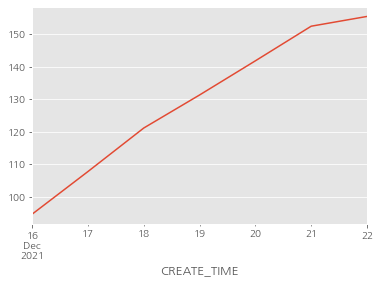

In [96]:
df_Image_mean.plot()

### Sensor Data

In [97]:
df_sensor = pd.read_csv("data/막곡농장(NAS) 2021-12-16 ~ 2022-01-13.csv")
df_sensor.shape

(2209362, 10)

In [98]:
df_sensor = df_sensor[~(df_sensor['SENSOR_DATA'].isnull())]
df_sensor = df_sensor[~(df_sensor['SENSOR_DATA']<0)]
df_sensor = df_sensor[(~(df_sensor['SENSOR_DATA'] == '\\N'))]

df_sensor['CREATE_TIME'] = df_sensor['CREATE_TIME'].astype(str)
df_sensor['CREATE_TIME'] = pd.to_datetime(df_sensor['CREATE_TIME'])

df_sensor.shape

(1738551, 10)

In [99]:
df_sensor.isna().sum()

TID                0
CREATE_TIME        0
FARM_ID            0
GATEWAY_ID         0
HOUSE_ID           0
MODULE_ID          0
SENSOR_TYPE        0
SENSOR_DATA        0
SENSOR_TIME        0
SENSOR_INFO    81171
dtype: int64

In [100]:
df_sensor = df_sensor.drop("SENSOR_INFO", axis=1)

In [101]:
pivoted = df_sensor.pivot_table(index='CREATE_TIME', columns='SENSOR_TYPE', values='SENSOR_DATA')

#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [102]:
pivoted

SENSOR_TYPE,CREATE_TIME,chickenweight,co2,humidity,nh3,temp
0,2021-12-16 00:00:00,219.951818,NaN,NaN,NaN,NaN
1,2021-12-16 00:00:35,NaN,5000.0,NaN,1.388484,NaN
2,2021-12-16 00:00:39,NaN,5000.0,NaN,0.846623,NaN
3,2021-12-16 00:00:45,NaN,5000.0,NaN,1.131752,NaN
4,2021-12-16 00:00:52,0.280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
128614,2022-01-12 23:56:56,NaN,4849.0,NaN,14.995090,NaN
128615,2022-01-12 23:57:06,NaN,4821.0,NaN,0.114870,NaN
128616,2022-01-12 23:58:26,NaN,NaN,79.44483,NaN,24.59999
128617,2022-01-12 23:58:46,NaN,5000.0,NaN,18.013950,NaN


In [103]:
grouped_df_mean = pivoted.groupby(pd.Grouper(key='CREATE_TIME' ,freq='1h')).mean()

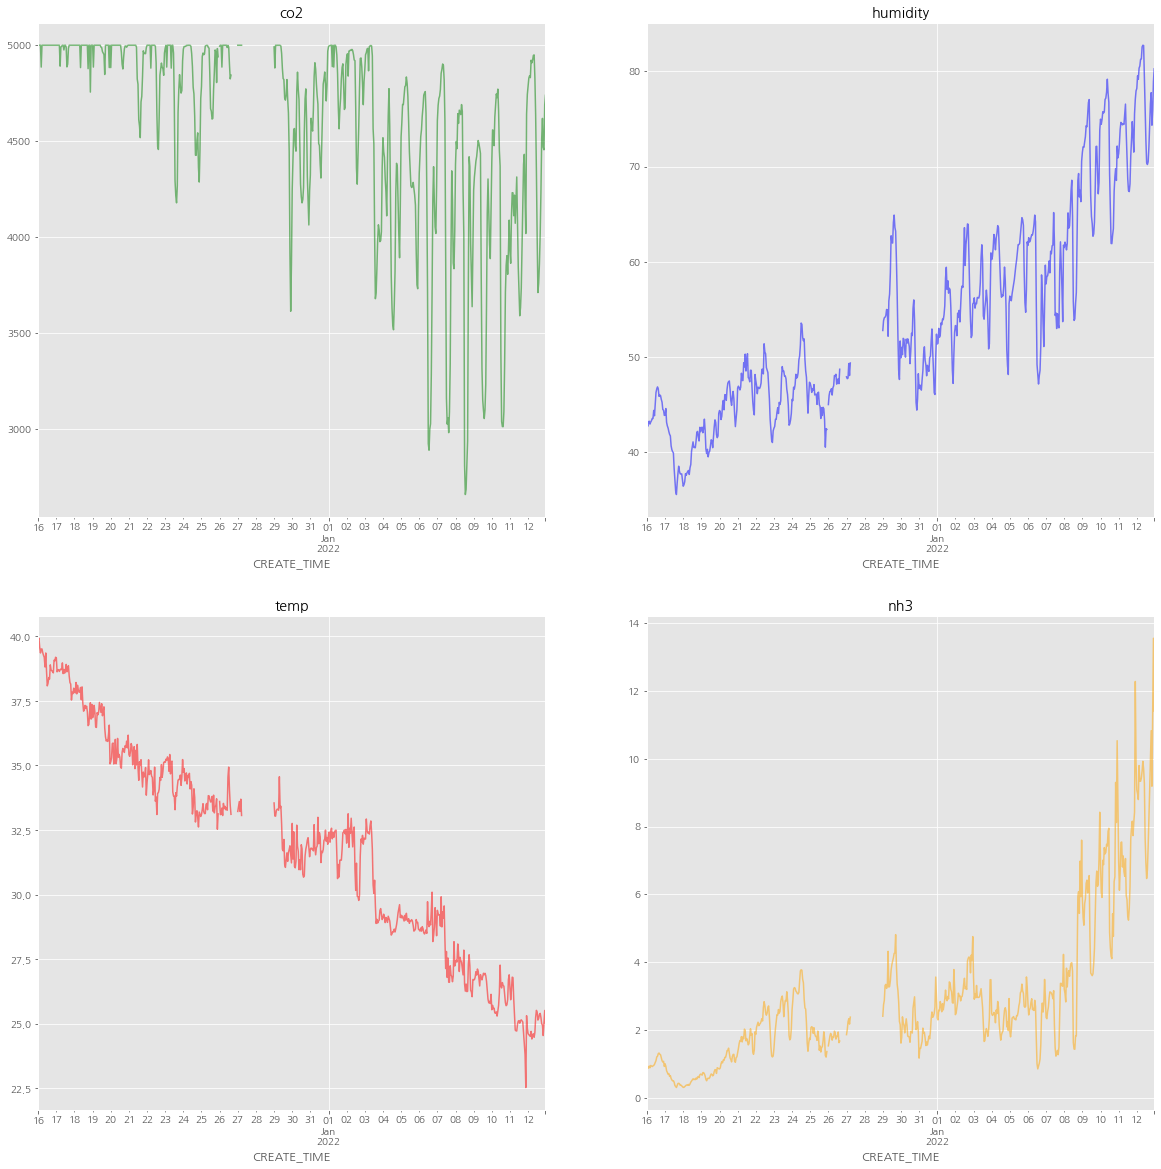

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))

grouped_df_mean['co2'].plot(kind="line", alpha=0.5, color='green', ax=ax[0, 0], title='co2')
grouped_df_mean['humidity'].plot(kind="line", alpha=0.5, color='blue', ax=ax[0, 1], title='humidity')
grouped_df_mean['temp'].plot(kind="line", alpha=0.5, color='red', ax=ax[1, 0], title='temp')
grouped_df_mean['nh3'].plot(kind="line", alpha=0.5, color='orange', ax=ax[1, 1], title='nh3')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

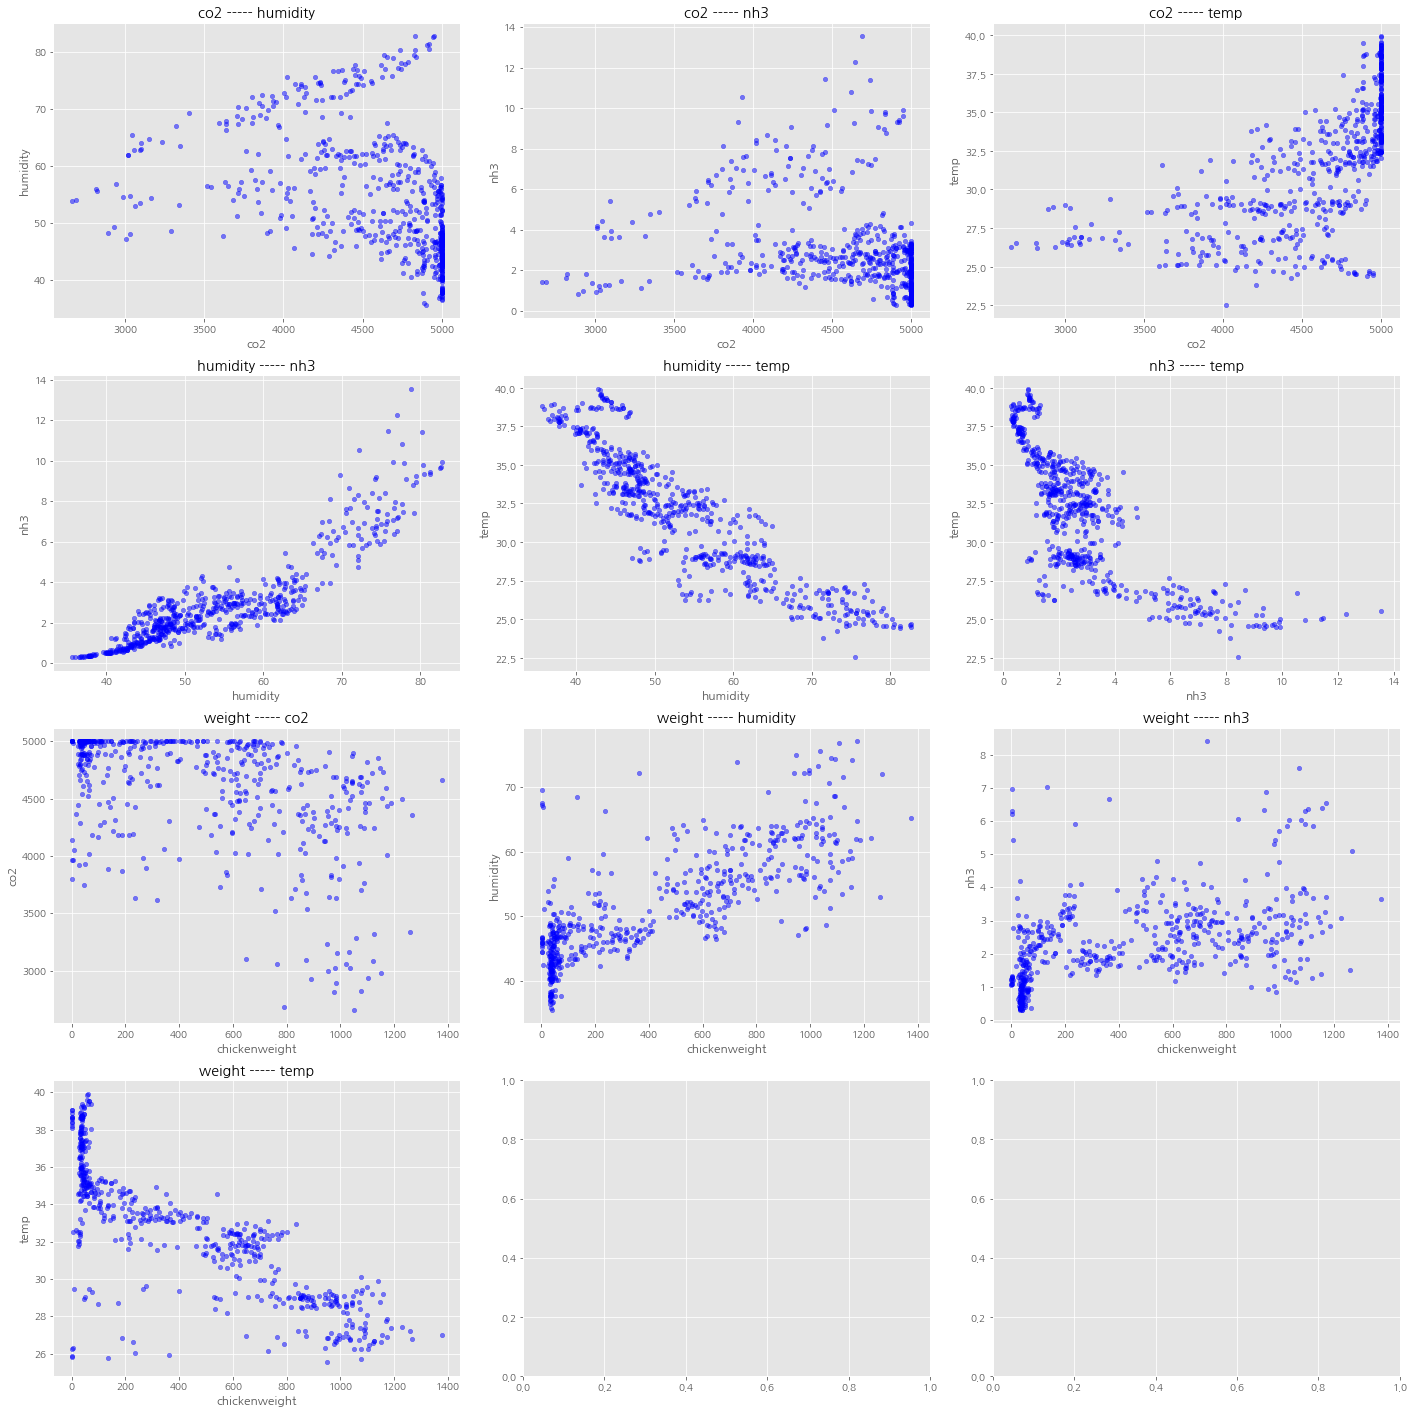

In [68]:
fig, ax = plt.subplots(4, 3, figsize=(20,20))

grouped_df_mean.plot(x='co2' ,y='humidity', color = 'blue' ,kind = "scatter" ,alpha=0.5, title ='co2 ----- humidity', ax=ax[0, 0])

grouped_df_mean.plot(x='co2' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- nh3', ax=ax[0, 1])

grouped_df_mean.plot(x='co2' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- temp', ax=ax[0, 2])

grouped_df_mean.plot(x='humidity' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- nh3', ax=ax[1, 0])

grouped_df_mean.plot(x='humidity' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- temp', ax=ax[1, 1])

grouped_df_mean.plot(x='nh3' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='nh3 ----- temp', ax=ax[1, 2])

grouped_df_mean.plot(x='chickenweight' ,y='co2', color = 'blue', kind = "scatter" ,alpha=0.5, title ='weight ----- co2', ax=ax[2, 0])

grouped_df_mean.plot(x='chickenweight' ,y='humidity', color = 'blue', kind = "scatter" ,alpha=0.5, title ='weight ----- humidity', ax=ax[2, 1])

grouped_df_mean.plot(x='chickenweight' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='weight ----- nh3', ax=ax[2, 2])

grouped_df_mean.plot(x='chickenweight' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='weight ----- temp', ax=ax[3, 0])


plt.tight_layout(pad=2, h_pad=1)
plt.show

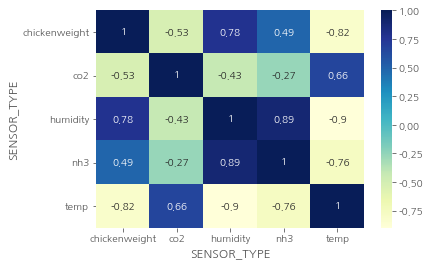

In [63]:
# heatmap 사용 결과
sns.heatmap(grouped_df_mean.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [115]:
array = np.arange(10)
array.reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])